In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-traffic-time-series-forecasting/train_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/sample_submission_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/sample_submission_1.csv.zip


In [2]:
import datetime

In [3]:
data1=pd.read_csv('/kaggle/input/web-traffic-time-series-forecasting/train_2.csv.zip')

In [4]:
data1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [5]:
data2=pd.read_csv('/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip')

In [6]:
data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
data1.shape

(145063, 804)

In [8]:
data2.shape

(145063, 551)

In [9]:
data1.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.415430e+05,1.413870e+05,1.413460e+05,1.418680e+05,1.424060e+05,1.432880e+05,1.415960e+05,1.440020e+05,1.417310e+05,1.394850e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.036314e+03,1.024713e+03,1.174865e+03,1.175681e+03,1.138931e+03,1.202851e+03,1.276387e+03,9.496720e+02,9.338783e+02,1.017055e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,4.999129e+04,5.713222e+04,6.743460e+04,6.915052e+04,6.646815e+04,6.386384e+04,6.726099e+04,5.048330e+04,4.536524e+04,5.704368e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.100000e+01,1.900000e+01,1.900000e+01,1.800000e+01,1.800000e+01,1.800000e+01,2.300000e+01,1.800000e+01,1.800000e+01,1.800000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.250000e+02,1.260000e+02,1.320000e+02,1.230000e+02,1.210000e+02,1.190000e+02,1.365000e+02,1.150000e+02,1.200000e+02,1.250000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,5.090000e+02,5.140000e+02,5.610000e+02,5.360000e+02,5.300000e+02,5.320000e+02,5.760000e+02,5.040000e+02,5.160000e+02,5.480000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,1.372256e+07,1.578888e+07,1.856151e+07,1.906250e+07,1.839517e+07,1.749919e+07,1.827305e+07,1.411666e+07,1.269626e+07,1.573111e+07


In [10]:
data1.isnull().sum(axis=0)

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2017-09-06     1775
2017-09-07     3467
2017-09-08     1061
2017-09-09     3332
2017-09-10     5578
Length: 804, dtype: int64

In [11]:
data1=data1.fillna(data1.median())

In [12]:
data1.isnull().sum(axis=0)

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2017-09-06    0
2017-09-07    0
2017-09-08    0
2017-09-09    0
2017-09-10    0
Length: 804, dtype: int64

In [13]:
data1.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,109.0,108.0,105.0,105.0,113.0,113.0,115.0,117.0,115.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
6,91Days_zh.wikipedia.org_all-access_spider,109.0,108.0,105.0,105.0,113.0,113.0,115.0,117.0,115.0,...,12.0,8.0,5.0,7.0,8.0,10.0,8.0,5.0,3.0,5.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,74.0,39.0,11.0,55.0,71.0,44.0,25.0,39.0,25.0,50.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,53.0,107.0,63.0,42.0,24.0,44.0,33.0,52.0,21.0,48.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,20.0,16.0,22.0,19.0,21.0,32.0,34.0,29.0,23.0,25.0


In [93]:
web1_data=pd.DataFrame()

In [94]:
web1_data['visit']=data1.iloc[0]

In [97]:
web1_data['webpage']='2NE1_zh.wikipedia.org_all-access_spider'

In [98]:
web1_data.drop(web1_data.index[0],axis=0,inplace=True)

In [99]:
web1_data.head(5)

,visit,webpage
2015-07-01,18,2NE1_zh.wikipedia.org_all-access_spider
2015-07-02,11,2NE1_zh.wikipedia.org_all-access_spider
2015-07-03,5,2NE1_zh.wikipedia.org_all-access_spider
2015-07-04,13,2NE1_zh.wikipedia.org_all-access_spider
2015-07-05,14,2NE1_zh.wikipedia.org_all-access_spider


In [100]:
web1_data['date'] = web1_data.index

In [101]:
web1_data.head()

,visit,webpage,date
2015-07-01,18,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01
2015-07-02,11,2NE1_zh.wikipedia.org_all-access_spider,2015-07-02
2015-07-03,5,2NE1_zh.wikipedia.org_all-access_spider,2015-07-03
2015-07-04,13,2NE1_zh.wikipedia.org_all-access_spider,2015-07-04
2015-07-05,14,2NE1_zh.wikipedia.org_all-access_spider,2015-07-05


In [102]:
dates=list(web1_data.date)

In [103]:
year=[]
month=[]
day=[]
day1=[]
for i in dates:
    date=i.split('-')
    year.append(date[0])
    month.append(date[1])
    day.append(date[2])
    ans = datetime.date(int(date[0]), int(date[1]),int( date[2]))
    day1.append(ans.strftime("%A"))

In [104]:
web1_data['year']=year
web1_data['month']=month
web1_data['day']=day
web1_data['day1']=day1

In [105]:
web1_data.head()

,visit,webpage,date,year,month,day,day1
2015-07-01,18,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,2015,07,01,Wednesday
2015-07-02,11,2NE1_zh.wikipedia.org_all-access_spider,2015-07-02,2015,07,02,Thursday
2015-07-03,5,2NE1_zh.wikipedia.org_all-access_spider,2015-07-03,2015,07,03,Friday
2015-07-04,13,2NE1_zh.wikipedia.org_all-access_spider,2015-07-04,2015,07,04,Saturday
2015-07-05,14,2NE1_zh.wikipedia.org_all-access_spider,2015-07-05,2015,07,05,Sunday


In [106]:
xfactor=web1_data['date']

In [107]:
del web1_data['date']

In [108]:
web1_data.head()

,visit,webpage,year,month,day,day1
2015-07-01,18,2NE1_zh.wikipedia.org_all-access_spider,2015,07,01,Wednesday
2015-07-02,11,2NE1_zh.wikipedia.org_all-access_spider,2015,07,02,Thursday
2015-07-03,5,2NE1_zh.wikipedia.org_all-access_spider,2015,07,03,Friday
2015-07-04,13,2NE1_zh.wikipedia.org_all-access_spider,2015,07,04,Saturday
2015-07-05,14,2NE1_zh.wikipedia.org_all-access_spider,2015,07,05,Sunday


In [109]:
web1_data.rename(columns={'day': 'date','day1':'day'}, inplace=True)

In [110]:
web1_data.head()

,visit,webpage,year,month,date,day
2015-07-01,18,2NE1_zh.wikipedia.org_all-access_spider,2015,07,01,Wednesday
2015-07-02,11,2NE1_zh.wikipedia.org_all-access_spider,2015,07,02,Thursday
2015-07-03,5,2NE1_zh.wikipedia.org_all-access_spider,2015,07,03,Friday
2015-07-04,13,2NE1_zh.wikipedia.org_all-access_spider,2015,07,04,Saturday
2015-07-05,14,2NE1_zh.wikipedia.org_all-access_spider,2015,07,05,Sunday


In [111]:
web1_data=web1_data.replace(to_replace ="Monday", 
                 value ="1",) 
web1_data=web1_data.replace(to_replace ="Tuesday", 
                 value ="2",) 
web1_data=web1_data.replace(to_replace ="Wednesday", 
                 value ="3",) 
web1_data=web1_data.replace(to_replace ="Thursday", 
                 value ="4",) 
web1_data=web1_data.replace(to_replace ="Friday", 
                 value ="5",) 
web1_data=web1_data.replace(to_replace ="Saturday", 
                 value ="6",) 
web1_data=web1_data.replace(to_replace ="Sunday", 
                 value ="7",) 

In [112]:
web1_data.head()

,visit,webpage,year,month,date,day
2015-07-01,18.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,01,3
2015-07-02,11.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,02,4
2015-07-03,5.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,03,5
2015-07-04,13.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,04,6
2015-07-05,14.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,05,7


In [113]:
day=web1_data['day']

In [114]:
weekday=[]
for i in day:
    if i == '6' or i== '7':
        weekday.append(0)
    else:
        weekday.append(1)

In [115]:
web1_data['weekday']=weekday

In [116]:
web1_data.head()

,visit,webpage,year,month,date,day,weekday
2015-07-01,18.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,01,3,1
2015-07-02,11.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,02,4,1
2015-07-03,5.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,03,5,1
2015-07-04,13.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,04,6,0
2015-07-05,14.0,2NE1_zh.wikipedia.org_all-access_spider,2015,07,05,7,0


In [117]:
import matplotlib.pyplot as plt

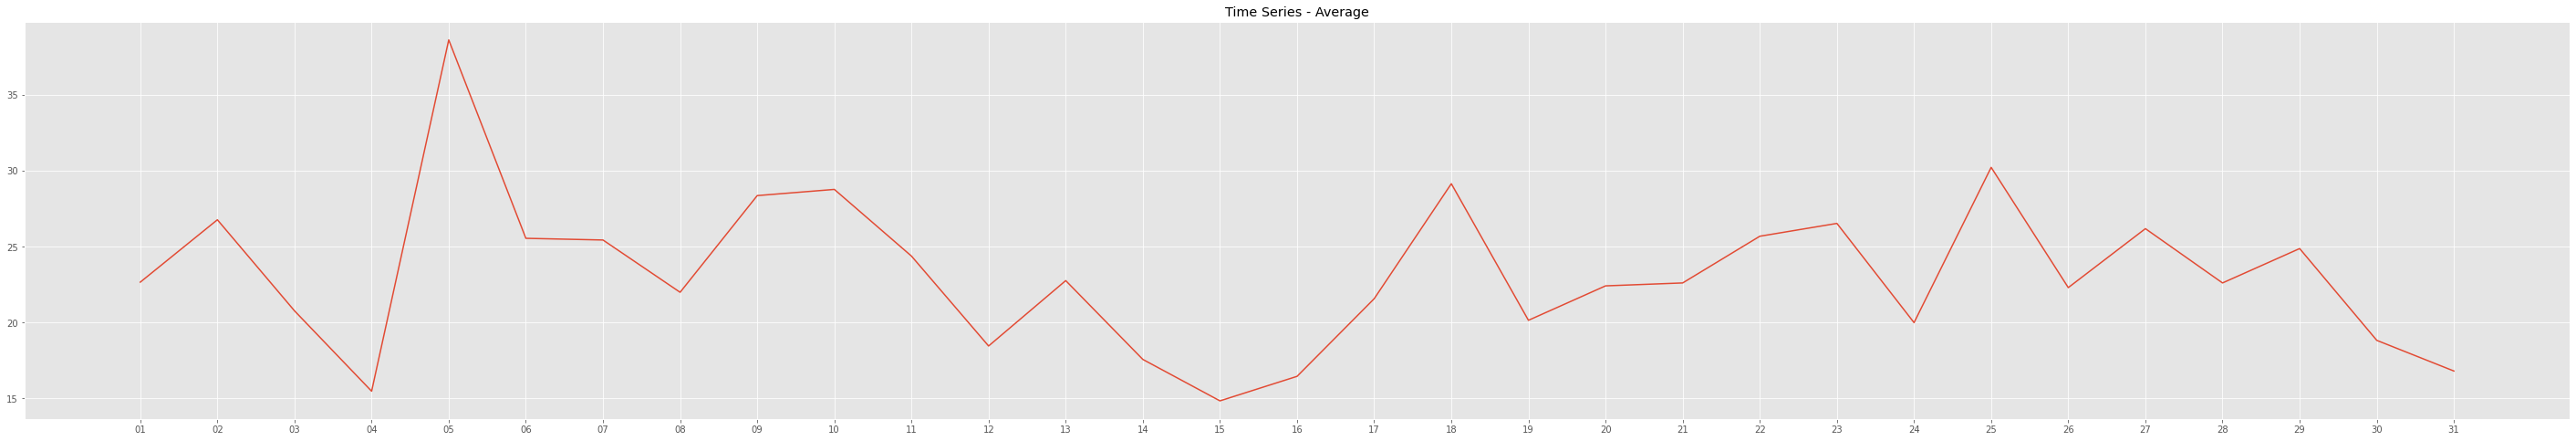

In [118]:
plt.figure(figsize=(50, 8))
mean_group = web1_data[['webpage','date','visit']].groupby(['date'])['visit'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

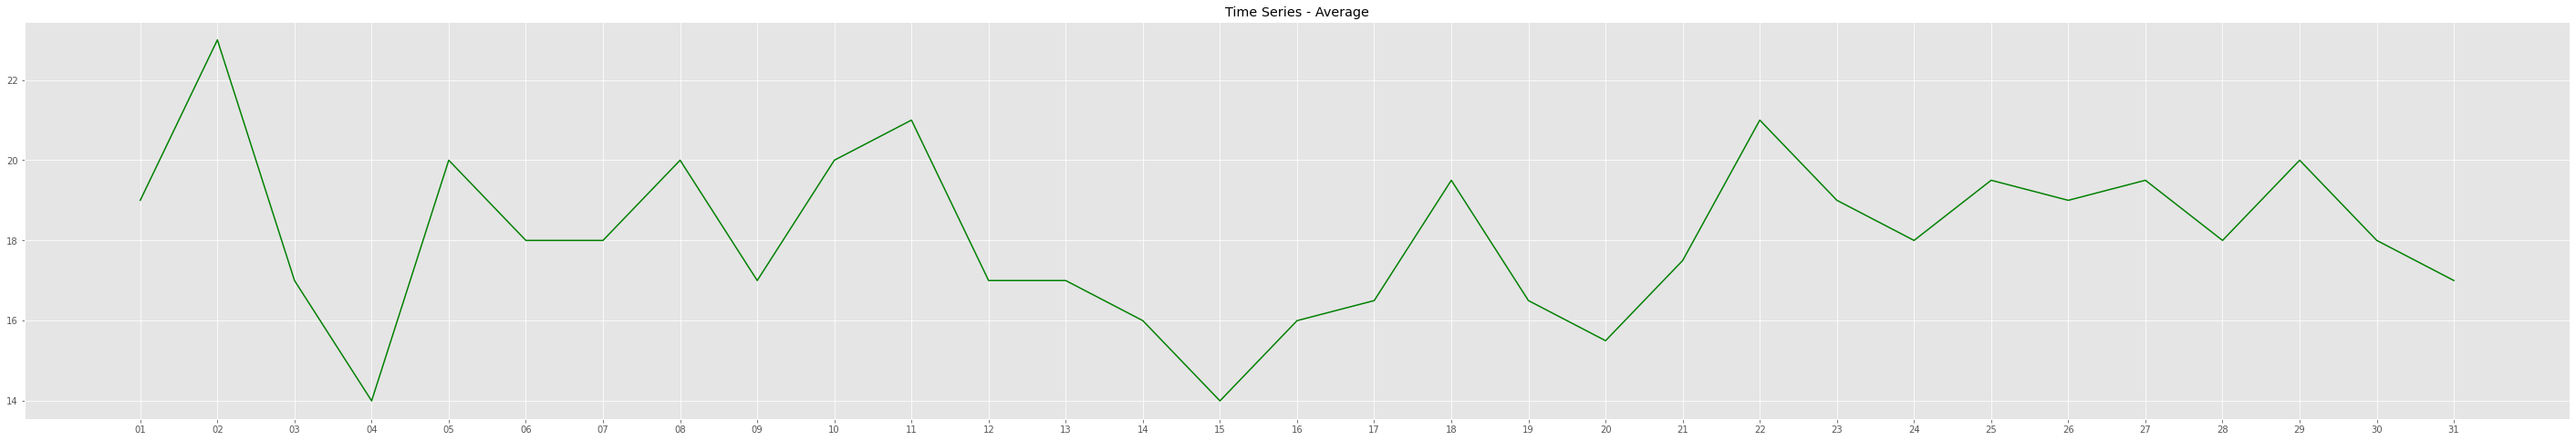

In [119]:
plt.figure(figsize=(50, 8))
median_group = web1_data[['webpage','date','visit']].groupby(['date'])['visit'].median()
plt.plot(median_group,color='g')
plt.title('Time Series - Average')
plt.show()

In [120]:
del web1_data['webpage']

In [121]:
y=web1_data.visit

In [122]:
X_train=web1_data[:562]
y_train=y[:562]

In [123]:
X_test=web1_data[563:803]
y_test=y[563:803]

In [124]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=1000)

In [125]:
model=regr.fit(X_train, y_train)

In [126]:
X_test.shape

(240, 6)

In [127]:
y_pred=model.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error

In [129]:
mean_absolute_error(y_test,y_pred)

2.955623184275464

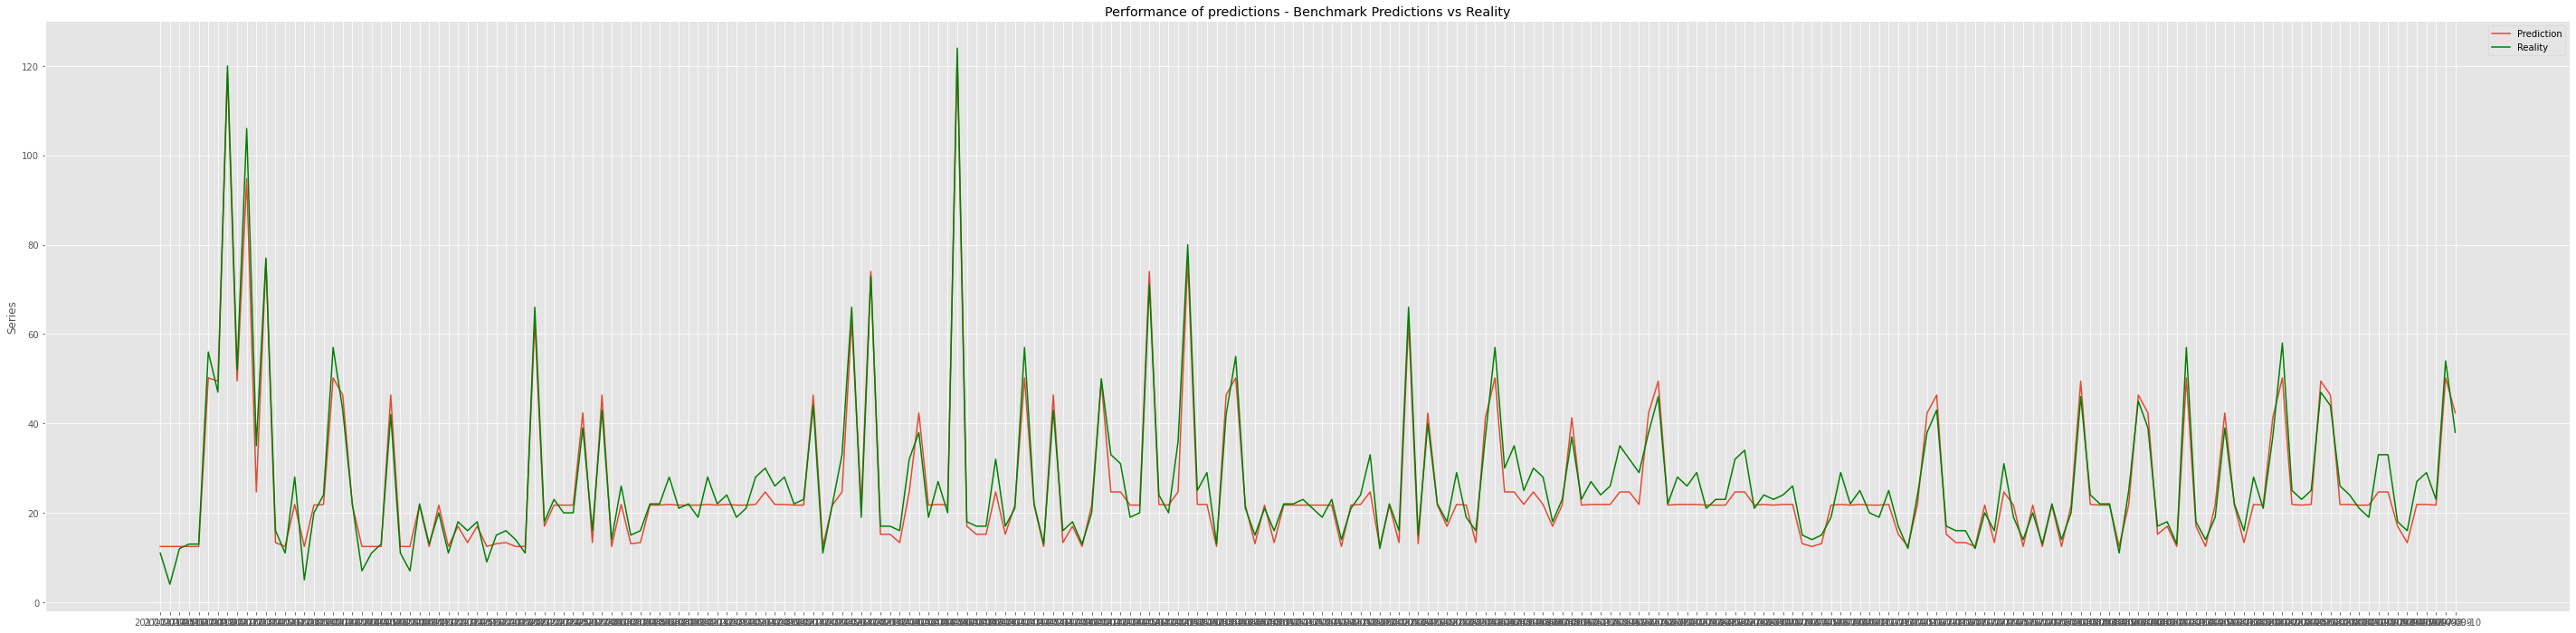

In [130]:
plt.style.use('ggplot')
plt.figure(figsize=(50, 12))
line_up, = plt.plot(y_pred,label='Prediction')
line_down, = plt.plot(y_test,label='Reality',color='g')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality')
plt.show()

In [131]:
import statsmodels.api as sm

In [132]:
def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['visits'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

In [133]:
web1_data['visits']=y
web1_data['act_date']=xfactor

In [134]:
example=web1_data[['visits','act_date']].set_index('act_date')

In [135]:
example.head()

,visits
act_date,
2015-07-01,18.0
2015-07-02,11.0
2015-07-03,5.0
2015-07-04,13.0
2015-07-05,14.0


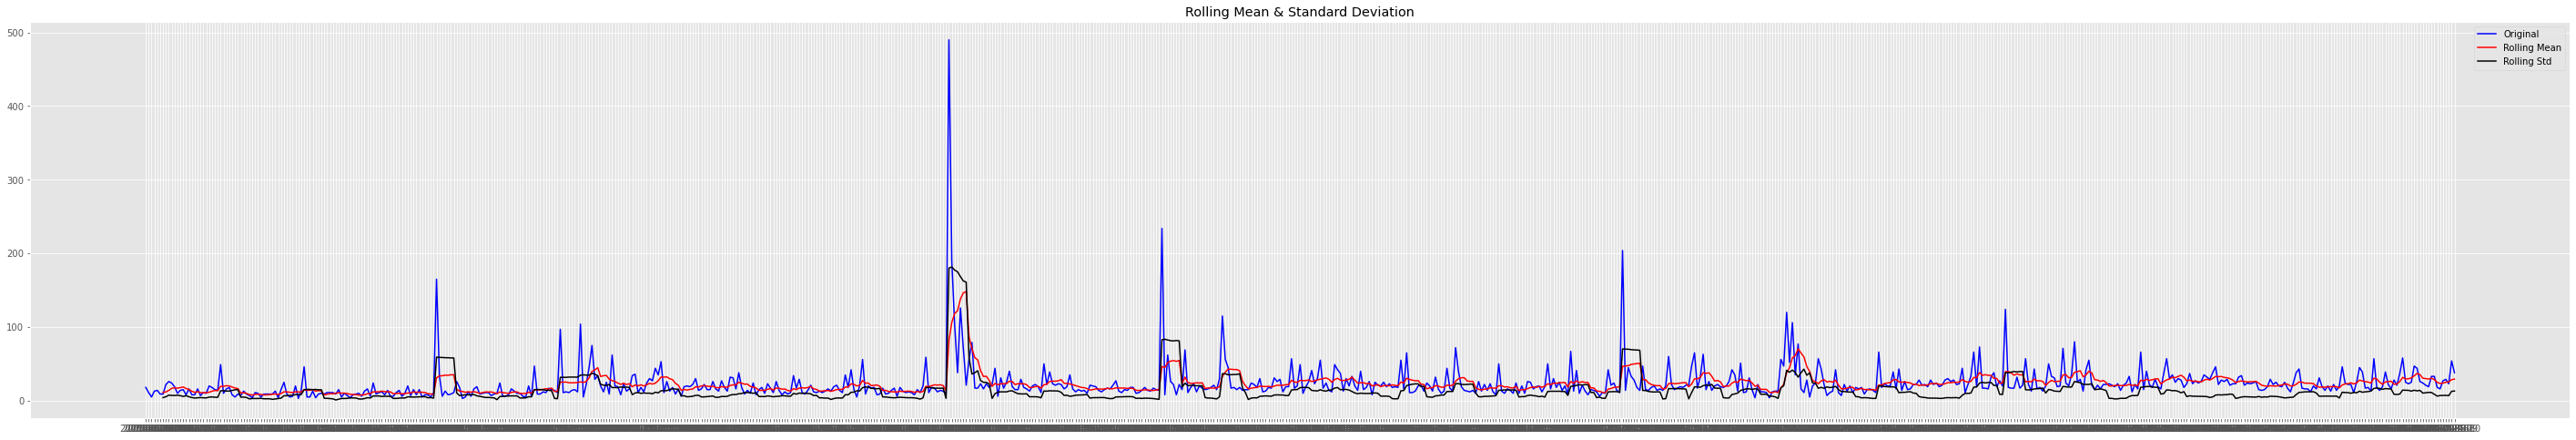

Results of Dickey-Fuller Test:
Test Statistic                -1.068907e+01
p-value                        3.766791e-19
#Lags Used                     3.000000e+00
Number of Observations Used    7.990000e+02
Critical Value (1%)           -3.438561e+00
Critical Value (5%)           -2.865164e+00
Critical Value (10%)          -2.568700e+00
dtype: float64


In [136]:
test_stationarity(example)  

In [137]:
from pylab import rcParams

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


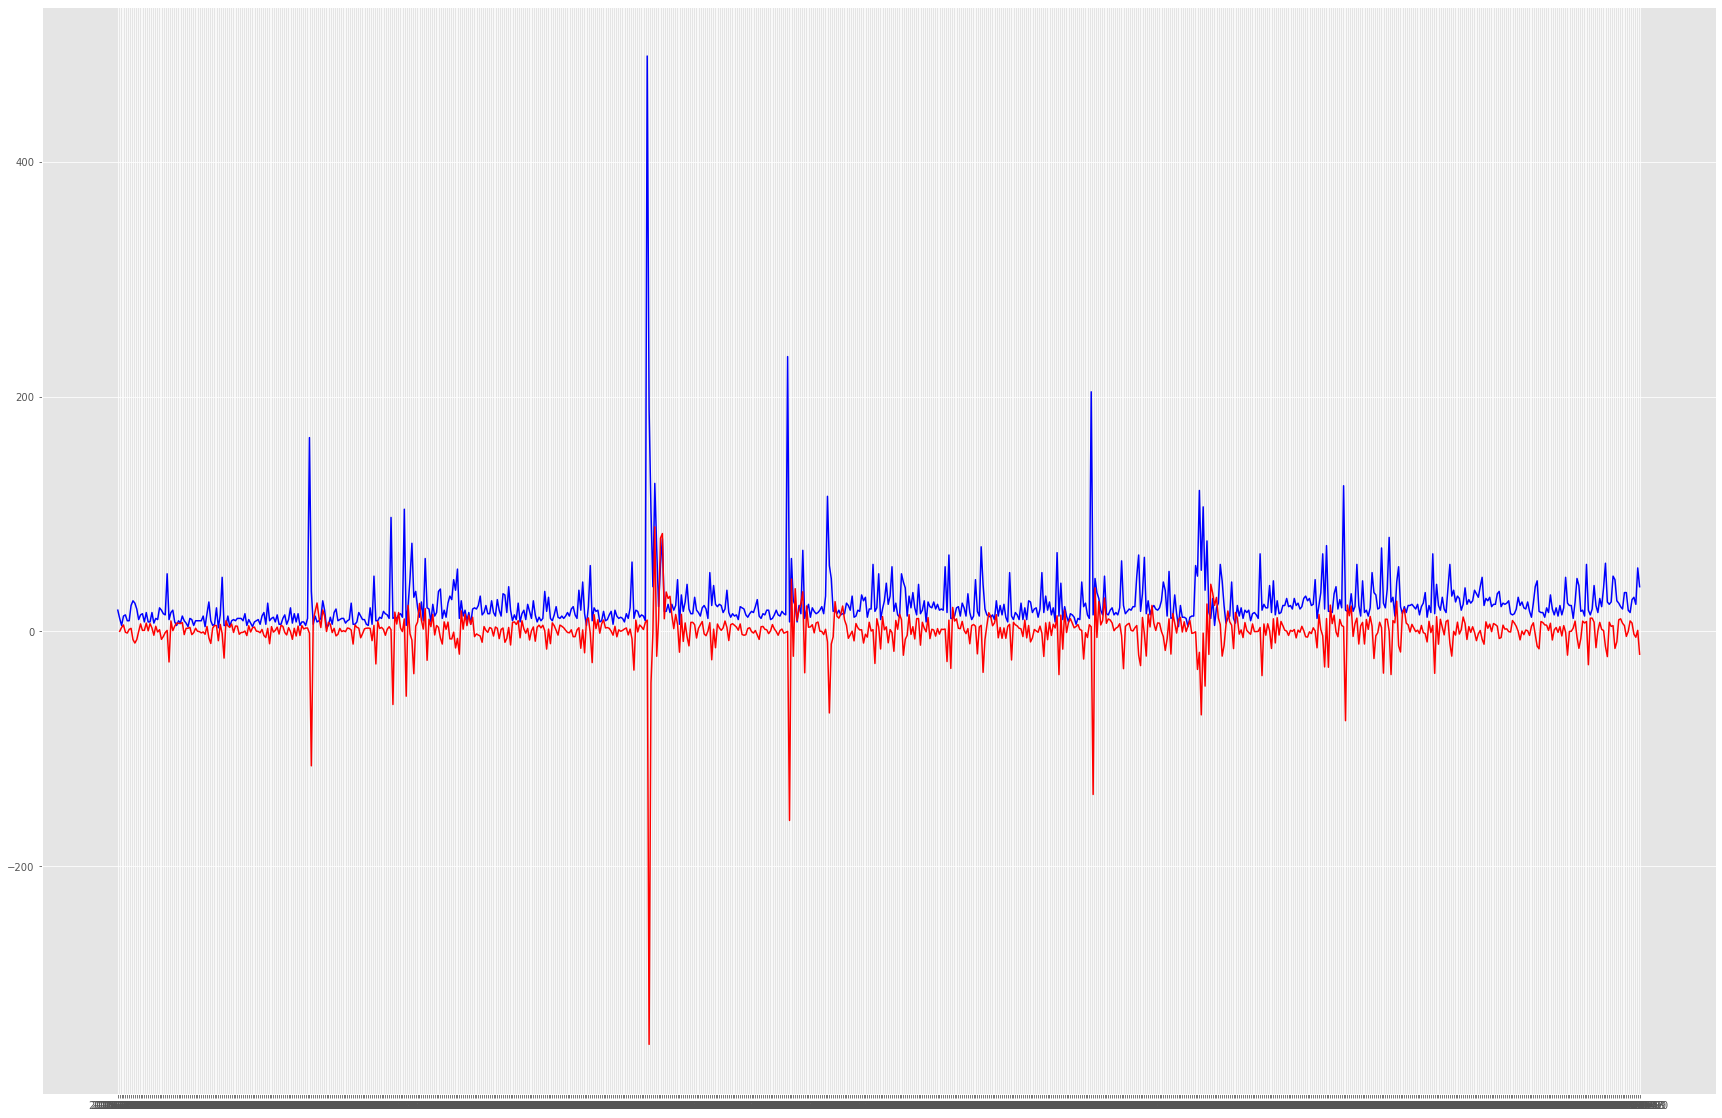

In [138]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(example, order=(7, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(example, color = 'blue')
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

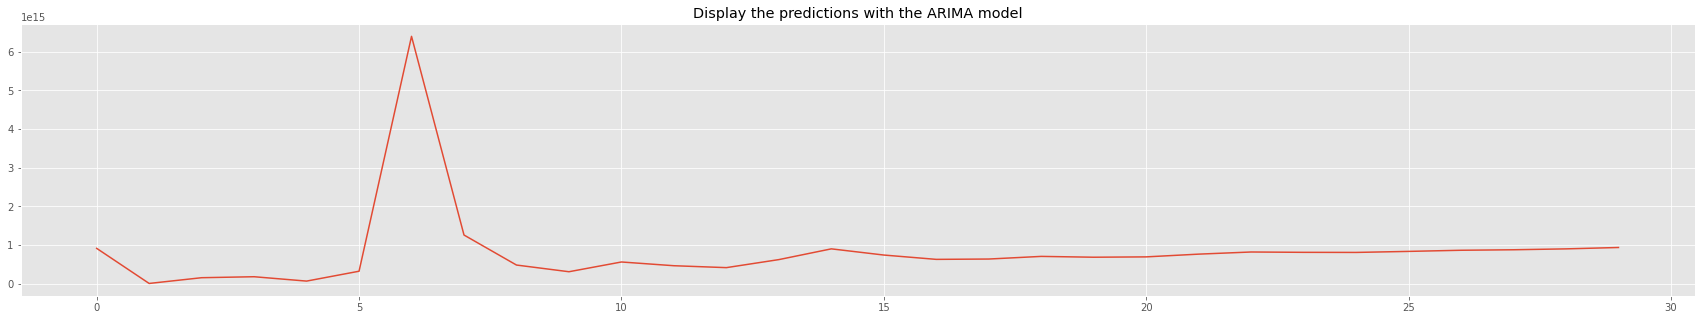

In [139]:
forecast = results_AR.forecast(steps = 30)[0]
plt.figure(figsize=(30, 5))
plt.plot(pd.DataFrame(np.exp(forecast)))
plt.title('Display the predictions with the ARIMA model')
plt.show()

In [141]:
import seaborn as sns

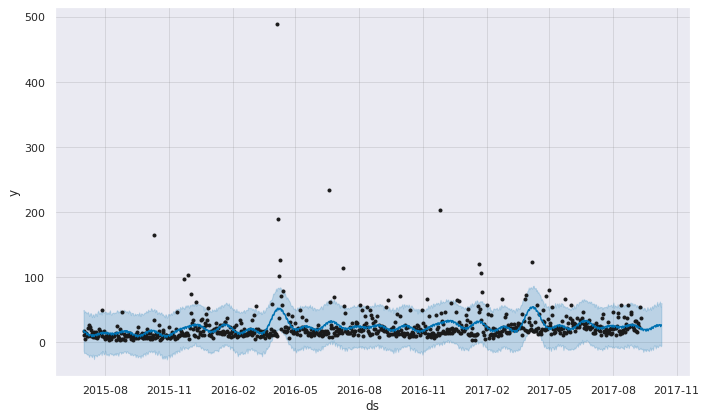

In [142]:
from fbprophet import Prophet
sns.set(font_scale=1) 
df_prophet = example.copy()
df_prophet.reset_index(drop=False,inplace=True)
df_prophet.columns = ['ds','y']

m = Prophet()
m.fit(df_prophet)
future = m.make_future_dataframe(periods=30,freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
m.plot_components(forecast);